## *Features Importance for total_sales*

In [ ]:
%run C:\Users\Omar\Siteck\Pyhton_Projects\demand_sales_data_Analysi\NoteBooks\2.Data_Cleaning.ipynb

### *A. Apply mutual_info_regression*

In [83]:
df2=df.copy()
df2.drop("date",axis=1,inplace=True)

* *Create mutual_info_regression Function :*

In [84]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

* *total_sales as a Target Feature :*

In [85]:
X_1 = df2.copy()
y_1= X_1.pop("total_sales")
# Label encoding for categoricals
for colname in X_1.select_dtypes("object"):
    X_1[colname], _ = X_1[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features_1 = X_1.dtypes == int

* *Apply mutual_info_regression Function :*

In [86]:
mi_scores_1 = make_mi_scores(X_1, y_1, discrete_features_1)

In [87]:
print(f"\n Faetures Importance for Severity Feature:\n {mi_scores_1}")  # show a few features with their MI scores


 Faetures Importance for Severity Feature:
 quantity              0.388932
price_per_case        0.302146
product_category03    0.145277
customer_id           0.128523
company               0.120586
product_id            0.118441
product               0.117138
product_category01    0.107324
year                  0.094828
company_region        0.090870
unit                  0.072834
order_id              0.059178
day_name              0.039612
month_name            0.019825
month                 0.014124
product_category02    0.007416
day                   0.005079
Name: MI Scores, dtype: float64


* *Visualize mutual_info_regression results :*

In [88]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)

Text(0.5, 1.0, 'total sales Mutual Information Scores')

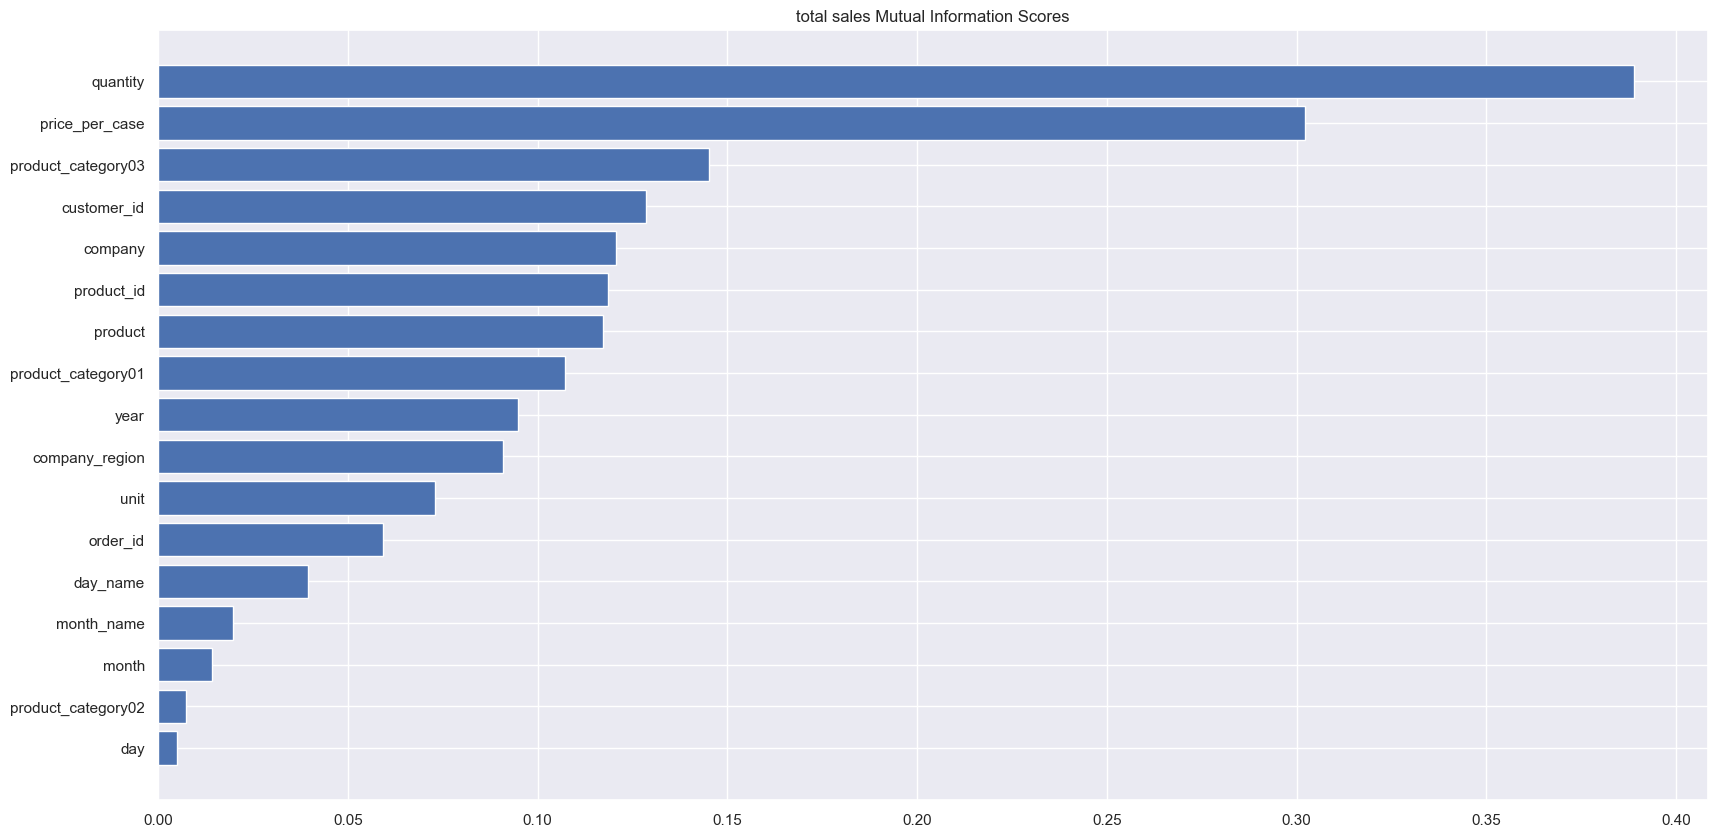

In [89]:
plot_mi_scores(mi_scores_1)
plt.title("total sales Mutual Information Scores")

### *B. Apply boruta Function*

In [90]:
from boruta import BorutaPy

In [96]:
from xgboost import XGBRegressor
model_XGBRegressor = XGBRegressor(n_estimators=1000,
                                            learning_rate=0.1,
                                            n_jobs=4)

In [98]:
boruta_FeatuteSelection=BorutaPy(model_XGBRegressor,n_estimators="auto",verbose=2,random_state=1)

In [99]:
boruta_FeatuteSelection.fit(X_1.to_numpy(),y_1.to_numpy())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	12
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	12
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	12
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	12
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	12
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	12
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	12
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	12
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	12
I

BorutaPy(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None, gpu_id=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=0.1,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=None, max_leaves=None,
                                min_child_weight=None, missing=nan,
                                monotone_constraints=None, n_estimators=28,
                                n_jobs=4, num_parallel_tree=None,
                                predictor=None, random_state=1475919653, ...),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1E4304FA740, verbose=2)

In [100]:
print("boruta_FeatuteSelection.n_features :",boruta_FeatuteSelection.n_features_)
print("boruta_FeatuteSelection.ranking :", boruta_FeatuteSelection.ranking_)
print("boruta_FeatuteSelection.support :",boruta_FeatuteSelection.support_ )

boruta_FeatuteSelection.n_features : 2
boruta_FeatuteSelection.ranking : [ 6  4 10  2 14  9  9 14 11  1 14  2  1  5 14  7  3]
boruta_FeatuteSelection.support : [False False False False False False False False False  True False False
  True False False False False]


In [101]:
pd.DataFrame({"feature_name":list(X_1.columns),
              "Ranking":boruta_FeatuteSelection.ranking_,
              "boruta_FeatuteSelection.support":boruta_FeatuteSelection.support_}).sort_values(by="Ranking")

,feature_name,Ranking,boruta_FeatuteSelection.support
12,year,1,True
9,quantity,1,True
3,product_id,2,False
11,price_per_case,2,False
16,day_name,3,False
1,company,4,False
13,month,5,False
0,order_id,6,False
15,day,7,False
6,product_category01,9,False


---